#Exploring ROC

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import sklearn.grid_search
import sklearn.feature_extraction
import sklearn.feature_extraction.text
import numpy as np
import pickle

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [2]:
clf = pickle.load(open('../pipe2.pkl', 'rb'))

In [3]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr, Xte, ytr, yte = get_training_test_set(rawtable, make_features=make_features5, 
                                               categorize_rating=categorize_rating5)

In [12]:
clf.fit(Xtr, ytr)

CalibratedClassifierCV(base_estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
            cv=3, method='isotonic')

In [4]:
clf.classes_

array(['4.75+', '4.75-'], 
      dtype='<U5')

In [5]:
class_numbers = {'4.75+': 1, '4.75-': 0}
yte.map(class_numbers)

id
air4412332    1
air922942     1
air4076586    1
air3488136    1
air1271134    1
air3095302    1
air1193796    1
air976242     0
air2351566    0
air2748209    0
air2698202    1
air4061743    1
air3697481    0
air4603306    0
air4457416    1
air4155012    1
air942443     1
air2571417    1
air288133     1
air3219582    1
air2051690    1
air2284536    0
air52874      1
air596310     1
air1355257    0
air216080     1
air1738415    1
air310220     1
air1594052    0
air2730045    1
             ..
air945663     0
air1283340    0
air121017     0
air2636661    1
air2811432    0
air3593491    0
air628227     1
air3271060    1
air4317807    1
air2379381    1
air2237617    1
air1223107    1
air522726     0
air715583     0
air132966     1
air122829     1
air2529243    0
air277416     1
air1799255    1
air4491163    1
air1633273    0
air3194055    0
air2514800    1
air3405627    0
air4149742    1
air1264641    0
air1150963    1
air2083242    0
air4121114    0
air2155720    1
Name: rating, dtype: 

In [13]:
precision, recall, thresholds = skl.metrics.precision_recall_curve(yte.map(class_numbers), 
                                                                   clf.predict_proba(Xte)[:, 0], 
                                                                   sample_weight=None)

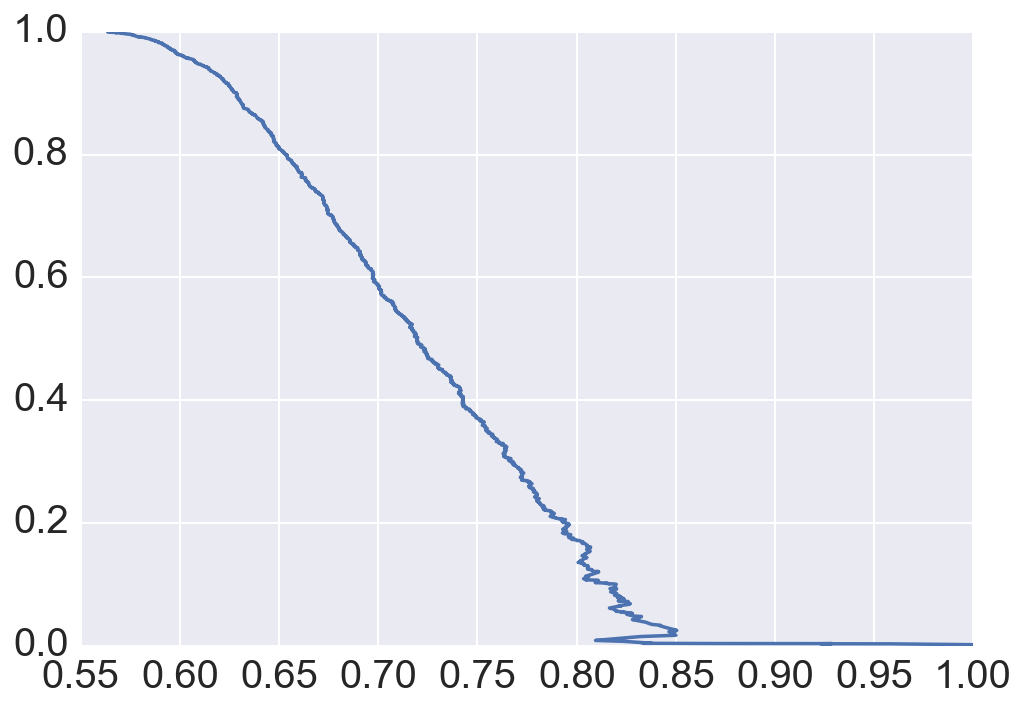

In [15]:
sns.set_context('notebook', font_scale=2)
plt.plot(precision, recall)

#Probability calibration

In [23]:
prob_true, prob_pred = skl.calibration.calibration_curve(yte.map(class_numbers), 
                                                         clf.predict_proba(Xte)[:, 0], 
                                                         normalize=False, n_bins=10)

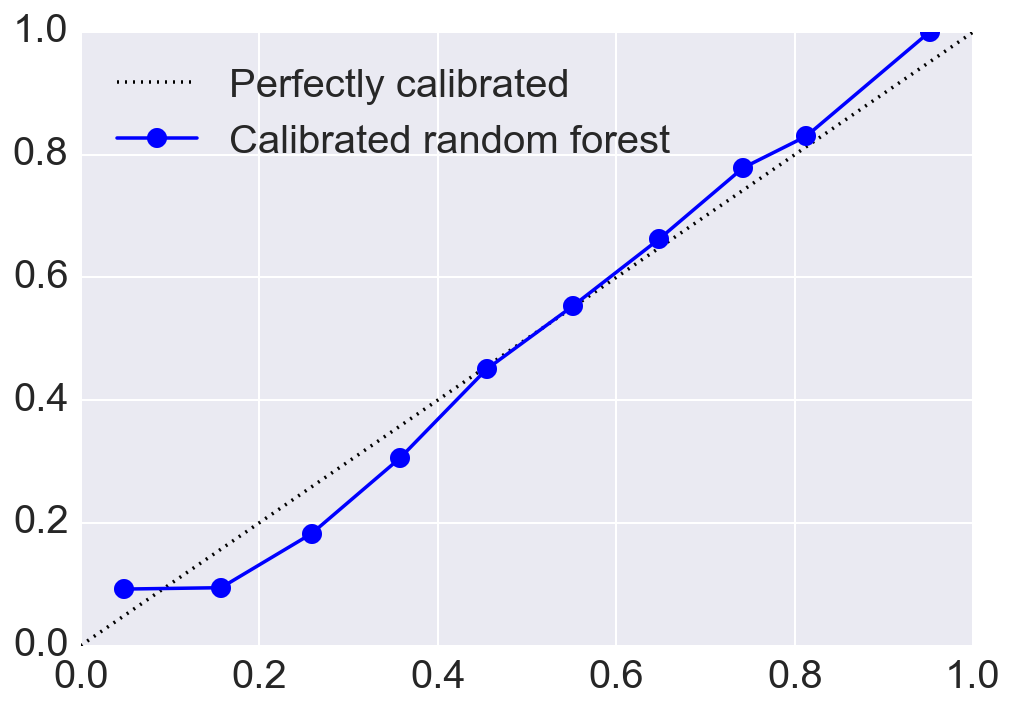

In [28]:
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.plot(prob_pred, prob_true, 'b.-', label='Calibrated random forest', markersize=20)
plt.legend(loc='upper left')